In [102]:
# Importing libs
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [103]:
# As a function of two variables I will use the parabaloid function
def parabaloid(x,y):
    return x**2+y**2

def parabaloid_grad(x,y):
    return np.array([2*x, 2*y])

In [104]:
# Gradient descent implementation
def grad_descent_mult(x_prev,learn_rate,grad_vector):
    epsilon = 0.00001
    grad_itter = 1
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    euc_dist = []
    x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    return (x_next, grad_itter, seq_x, seq_y, euc_dist)
    
start = np.array([5,10])
final_point, num_iter, x_sequence, y_sequence, euc_distances = grad_descent_mult(start, 0.01, parabaloid_grad)

print('Found minimum: ', final_point)
print('Iterations number: ', num_iter)

Found minimum:  [0.00021794 0.00043587]
Iterations number:  497


C:\Users\sorok\AppData\Local\Temp\ipykernel_9156\1529164797.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


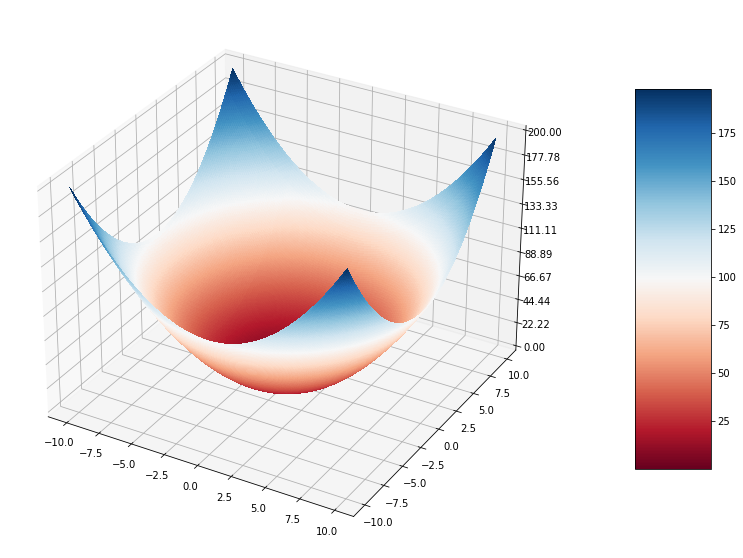

In [105]:
# Visualizating an object function
X, Y = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
Z = parabaloid(X,Y)
fig = plt.figure(figsize = (30, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, parabaloid(X,Y), rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

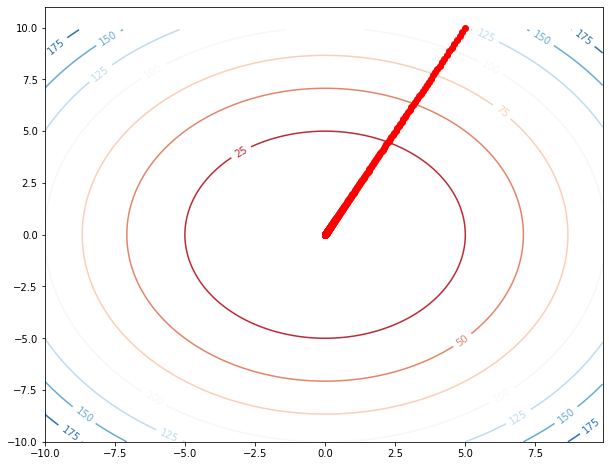

In [106]:
# Visualizating our optimization path (Gradient descent)
plt.figure(figsize=(10, 8))
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS)
plt.plot(x_sequence,y_sequence,'ro')

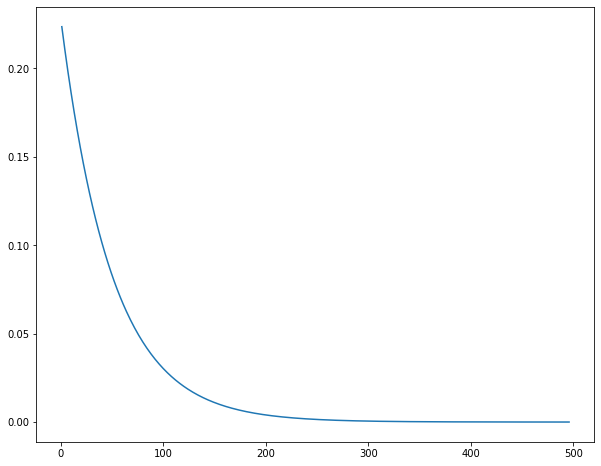

In [107]:
# Visualizating our optimization distances (Gradient descent)
plt.figure(figsize=(10, 8))
plt.plot( np.linspace(1, euc_distances.size, euc_distances.size), euc_distances)

In [108]:
# ADAM implementation
beta_1 = 0.9
beta_2 = 0.999
epsilon = 0.00001

def corr_val(value, coef, t):
    corr_val_x = value[0]/(1-coef**t)
    corr_val_y = value[1]/(1-coef**t)
    return np.array([corr_val_x,corr_val_y])

def adam_mult(x_prev,learn_rate,grad_vector):
    t_iter = 1
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    euc_dist = []
    grad_vec = grad_vector(x_prev[0],x_prev[1])
    v_val = (1-beta_2) * np.power( grad_vec, 2) 
    s_val = (1-beta_1) * grad_vec
    v_val_corr = corr_val(v_val, beta_2, t_iter)
    s_val_corr = corr_val(s_val, beta_1, t_iter)
    x_next = x_prev - learn_rate * s_val_corr / (np.sqrt(v_val_corr) + epsilon)
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))
        x_prev = x_next
        grad_vec = grad_vector(x_prev[0],x_prev[1])
        v_val = beta_2*v_val + (1-beta_2) * np.power( grad_vec, 2)
        v_val_corr = corr_val(v_val, beta_2, t_iter)
        s_val = beta_1*s_val + (1-beta_1) * grad_vec
        s_val_corr = corr_val(s_val, beta_1, t_iter)
        x_next = x_prev - learn_rate * s_val_corr / (np.sqrt(v_val_corr) + epsilon)
        t_iter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    return (x_next, t_iter, seq_x, seq_y, euc_dist)
start_point = np.array([5,10])
final_point, num_iter, x_sequence, y_sequence, euc_distances = adam_mult(start_point, 0.01, parabaloid_grad)

print('Found minimum: ', final_point)
print('Iterations number: ', num_iter)

Found minimum:  [9.27933192e-13 1.61954451e-03]
Iterations number:  3046


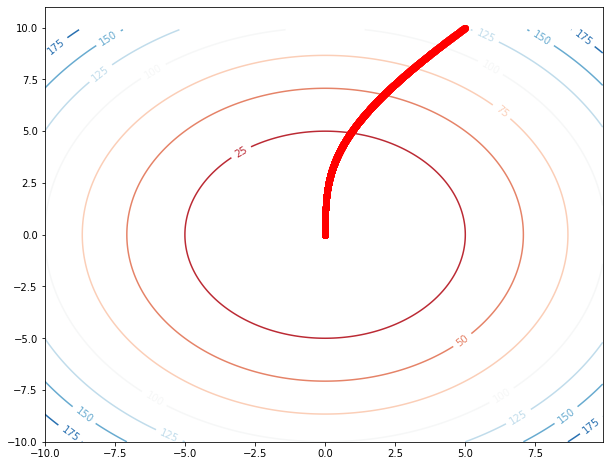

In [109]:
# Visualizating our optimization path (ADAM)
X, Y = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
Z = parabaloid(X,Y)
plt.figure(figsize=(10, 8))
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x_sequence,y_sequence,'ro')

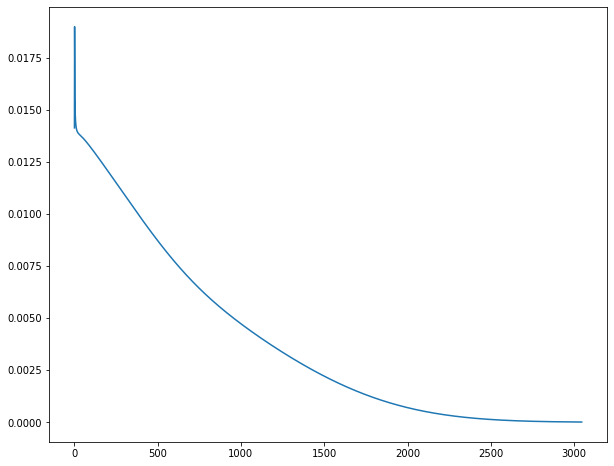

In [110]:
# Visualizating our optimization distances (ADAM)
plt.figure(figsize=(10, 8))
plt.plot(np.linspace(1, euc_distances.size, euc_distances.size), euc_distances)